<a href="https://colab.research.google.com/github/HamdanXI/nlp_adventure/blob/main/801%20code/merged_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# All User Data
data_all = {
    "Model": ["T5-Small: ASLG-PC12", "T5-Small: Merged Dataset NV", "T5-Small: Merged Dataset AANV", "T5-Small: Daily Dialogue GC", "GPT-4", "Golden Text"],
    "1st": [1, 0, 5, 1, 15, 9],
    "2nd": [7, 7, 6, 5, 3, 5],
    "3rd": [4, 4, 3, 4, 1, 3],
    "4th": [3, 5, 4, 5, 0, 2],
    "5th": [2, 5, 2, 2, 0, 1],
    "6th": [0, 0, 0, 2, 0, 0]
}

df_all = pd.DataFrame(data_all)
df_all.set_index('Model', inplace=True)

# Points for each position
points = { '1st': 5, '2nd': 4, '3rd': 3, '4th': 2, '5th': 1, '6th': 0 }

# Calculate total points for each model
df_all['Total Points'] = df_all.apply(lambda row: sum(row[position] * points[position] for position in points), axis=1)



# ASL User Data
data_asl_user = {
    "Model": ["T5-Small: ASLG-PC12", "T5-Small: Merged Dataset NV", "T5-Small: Merged Dataset AANV", "T5-Small: Daily Dialogue GC", "GPT-4", "Golden Text"],
    "1st": [1, 1, 2, 6, 2, 19],  # Golden Text highest, ASLG-PC12 lowest
    "2nd": [5, 7, 6, 6, 8, 1],  # Merged Dataset GC second, Merged Dataset NV fifth
    "3rd": [4, 3, 5, 4, 3, 0],  # GPT-4 third
    "4th": [3, 4, 5, 4, 3, 0],  # Merged Dataset AANV fourth
    "5th": [3, 4, 1, 0, 4, 0],
    "6th": [4, 1, 1, 0, 0, 0]
}

df_asl_user = pd.DataFrame(data_asl_user)
df_asl_user.set_index('Model', inplace=True)

# Calculate total points for each model with the adjusted data
df_asl_user['Total Points'] = df_asl_user.apply(lambda row: sum(row[position] * points[position] for position in points), axis=1)

# Sort the DataFrame based on 'Total Points' in descending order
df_asl_user = df_asl_user.sort_values(by='Total Points', ascending=False)

# Get the sorted order of models from df_asl_user
sorted_models = df_asl_user.index.tolist()

# Reorder df_all to match the sorted order of df_asl_user
df_all = df_all.reindex(sorted_models)

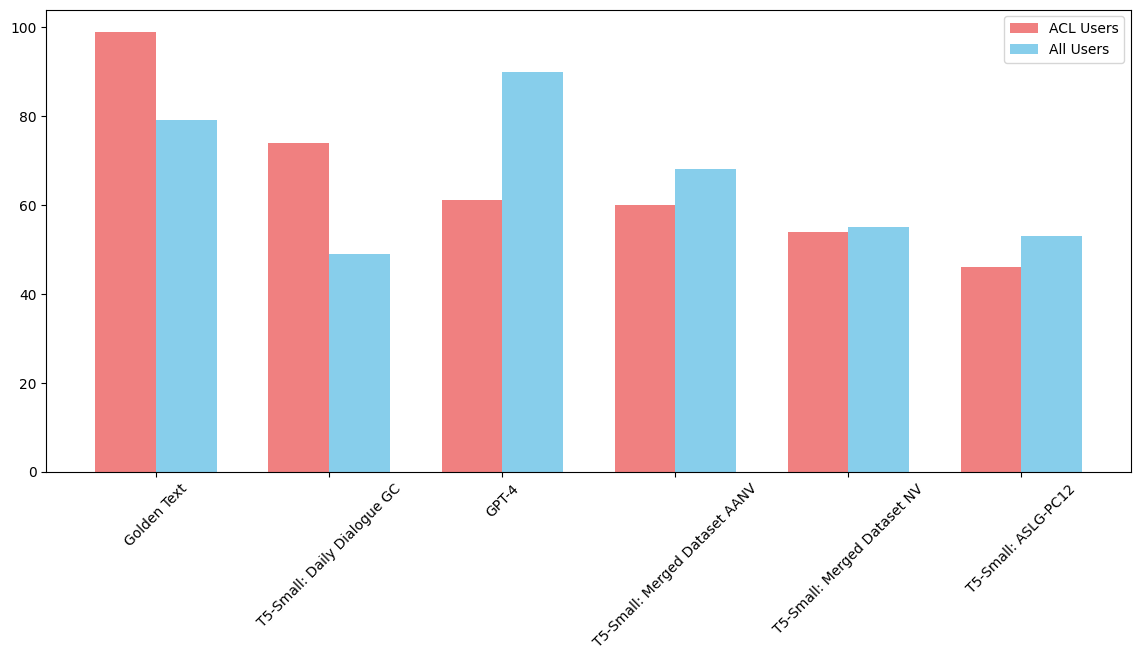

In [19]:
# Merging the two datasets into a single graph
plt.figure(figsize=(14, 6))

# Width of the bars in the bar chart
bar_width = 0.35

# Setting the positions of the bars
acl_users_bar_positions = range(len(df_asl_user))
all_users_bar_positions = [x + bar_width for x in acl_users_bar_positions]

# Plotting the data
plt.bar(acl_users_bar_positions, df_asl_user['Total Points'], width=bar_width, color='lightcoral', label='ACL Users')
plt.bar(all_users_bar_positions, df_all['Total Points'], width=bar_width, color='skyblue', label='All Users')

# Adding labels, title and legend
plt.xticks([r + bar_width/2 for r in range(len(df_asl_user))], df_asl_user.index, rotation=45)
plt.legend()

# Showing the plot
plt.show()